In [190]:
# Load basic packages
import numpy as np
import pandas as pd
# Install autograd:
#!conda install -c conda-forge autograd

import autograd.numpy as numpy
import autograd.numpy.random as npr

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import metrics
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score

Accuracy of Logistic Regression = 86.3%
AUC of Logistic Regression = 0.825


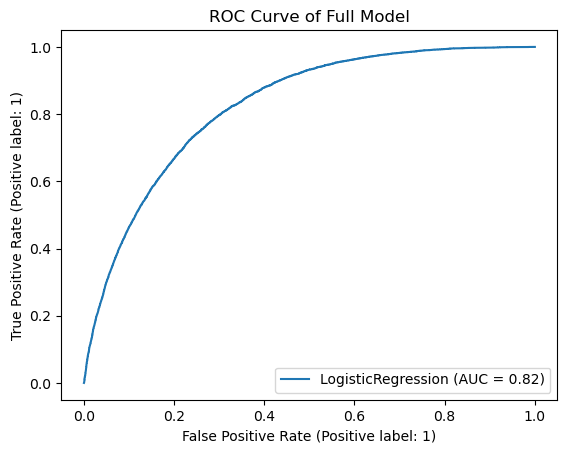

In [194]:
# Logistic Regression
model_all = LogisticRegression(solver = 'liblinear')
model_all.fit(X_train, y_train)
pred_all = model_all.predict(X_val)

accuracy = metrics.accuracy_score(y_val, pred_all)
print(f"Accuracy of Logistic Regression = {accuracy * 100:.1f}%")
metrics.RocCurveDisplay.from_estimator(model_all, X_val, y_val)
plt.title('ROC Curve of Full Model')
y_prob = model_all.predict_proba(X_val)[:, 1]  # Get probability of class 1
auc = metrics.roc_auc_score(y_val, y_prob)
print(f"AUC of Logistic Regression = {auc:.3f}")

In [196]:
# Find the best predictor
auc = []
var_label = []
for i in list(X_train.columns):
    model = LogisticRegression(solver = 'liblinear')
    model_single = model.fit(X_train.drop(i, axis = 1), y_train)
    pred_single = model_single.predict(X_val.drop(i, axis = 1))
    
    # accuracy.append(metrics.accuracy_score(y_val, pred_single))
    y_prob = model_single.predict_proba(X_val.drop(i, axis = 1))[:, 1]  # Get probability of class 1
    auc.append(metrics.roc_auc_score(y_val, y_prob))
    var_label.append(str(i))
    
print(pd.Series(auc,var_label))
performance = pd.Series(auc,var_label)
print(performance.idxmin())

HighBP                   0.817079
HighChol                 0.818636
BMI                      0.809921
Smoker                   0.824545
Stroke                   0.824322
Myocardial               0.823873
PhysActivity             0.824514
Fruit                    0.824558
Vegetables               0.824495
HeavyDrinker             0.823361
HasHealthcare            0.824441
NotAbleToAffordDoctor    0.824542
GeneralHealth            0.809229
MentalHealth             0.824460
PhysicalHealth           0.824354
HardToClimbStairs        0.824330
BiologicalSex            0.823560
AgeBracket               0.816585
EducationBracket         0.824437
IncomeBracket            0.823870
Zodiac_2                 0.824544
Zodiac_3                 0.824545
Zodiac_4                 0.824554
Zodiac_5                 0.824568
Zodiac_6                 0.824543
Zodiac_7                 0.824539
Zodiac_8                 0.824541
Zodiac_9                 0.824539
Zodiac_10                0.824543
Zodiac_11     

Text(0.5, 1.0, 'ROC Curve')

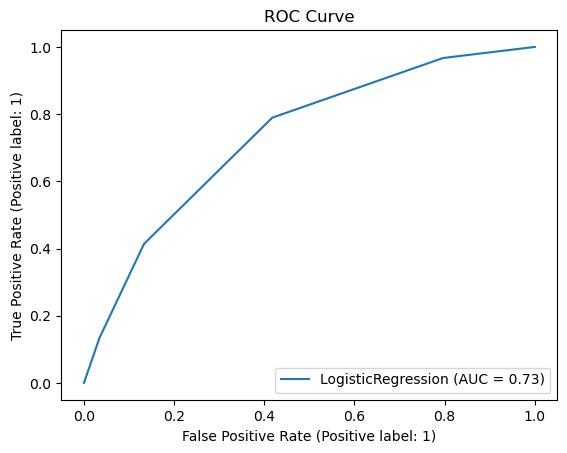

In [198]:
# AUC of the best predictor model
model_best_predictor = LogisticRegression(solver = 'liblinear')
model_best_predictor.fit(X_train['GeneralHealth'].to_numpy().reshape(-1,1), y_train)
pred_single = model_best_predictor.predict(X_val['GeneralHealth'].to_numpy().reshape(-1,1))
metrics.RocCurveDisplay.from_estimator(model_best_predictor, X_val['GeneralHealth'].to_numpy().reshape(-1,1), y_val)
plt.title('ROC Curve')

In [200]:
# Data Cleaning for Linear SVM
df = pd.read_csv('diabetes.csv')
df = df.dropna()

# standardize continuous variables
continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
df[continuous_variables] = df[continuous_variables].apply(lambda x:(x - np.mean(x))/np.std(x))

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

df['BiologicalSex'] = df['BiologicalSex'].apply(lambda x:x - 1)

df = df.drop(['Zodiac','Zodiac_1'],axis = 1)

train_data, val_data = model_selection.train_test_split(df, test_size = 0.2,random_state = 0)
X_train = train_data.drop('Diabetes', axis = 1) # We drop the target from the features.
X_val  = val_data.drop('Diabetes', axis = 1)  # Note that this does not operate inplace.
y_train = train_data['Diabetes']
y_val  = val_data['Diabetes']

Linear SVM validation accuracy of full model= 86.1%
AUC for Linear SVM: 0.825


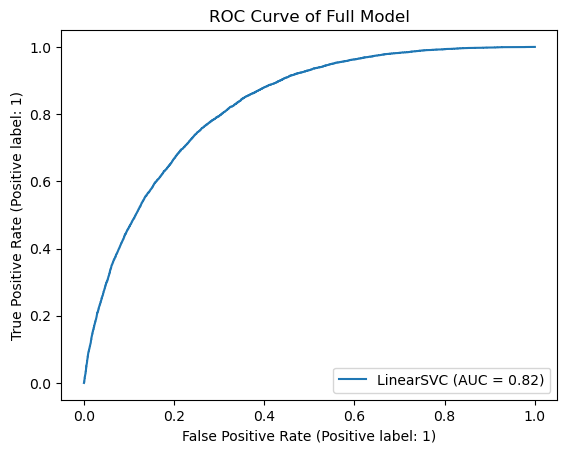

In [202]:
# SVM
svm_all = LinearSVC(C = 1e10, dual = False)
svm_all.fit(X_train, y_train)
y_pred = svm_all.predict(X_val)

acc = metrics.accuracy_score(y_val, y_pred)

print('Linear SVM validation accuracy of full model= {:0.1f}%'.format(100*acc))
metrics.RocCurveDisplay.from_estimator(svm_all, X_val, y_val)
plt.title('ROC Curve of Full Model')
decision_scores = svm_all.decision_function(X_val)
auc = roc_auc_score(y_val, decision_scores)
print(f"AUC for Linear SVM: {auc:.3f}")

In [204]:
# Find the predictor which drops the model performance most
auc = []
var_label = []
for i in list(X_train.columns):
    svm_single = LinearSVC(C = 1e10, dual = False)
    svm_single.fit(X_train.drop(i, axis = 1), y_train)
    y_pred_single = svm_single.predict(X_val.drop(i, axis = 1))
    
    y_decision_scores = svm_single.decision_function(X_val.drop(i, axis = 1))
    auc.append(roc_auc_score(y_val, y_decision_scores))
    var_label.append(str(i))
    
print(pd.Series(auc,var_label))
performance = pd.Series(auc,var_label)
print(performance.idxmin())

HighBP                   0.817616
HighChol                 0.819176
BMI                      0.810076
Smoker                   0.824900
Stroke                   0.824527
Myocardial               0.824300
PhysActivity             0.824849
Fruit                    0.824873
Vegetables               0.824839
HeavyDrinker             0.823716
HasHealthcare            0.824754
NotAbleToAffordDoctor    0.824865
GeneralHealth            0.809802
MentalHealth             0.824783
PhysicalHealth           0.824757
HardToClimbStairs        0.824740
BiologicalSex            0.823894
AgeBracket               0.817141
EducationBracket         0.824767
IncomeBracket            0.824234
Zodiac_2                 0.824868
Zodiac_3                 0.824870
Zodiac_4                 0.824883
Zodiac_5                 0.824903
Zodiac_6                 0.824869
Zodiac_7                 0.824868
Zodiac_8                 0.824873
Zodiac_9                 0.824867
Zodiac_10                0.824867
Zodiac_11     

Text(0.5, 1.0, 'ROC Curve')

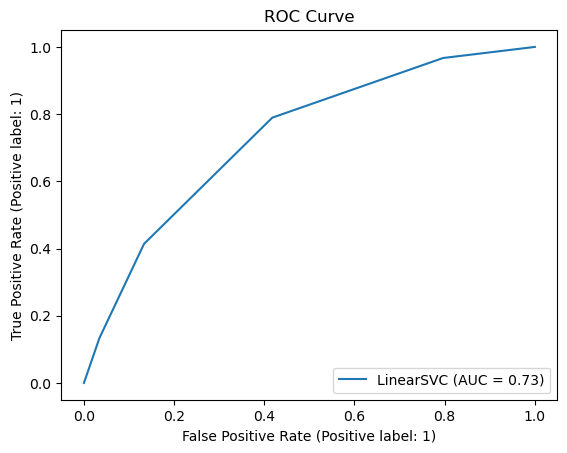

In [206]:
# AUC of the best predictor model
svm_best_predictor = LinearSVC(C = 1e10, dual = False)
svm_best_predictor.fit(X_train['GeneralHealth'].to_numpy().reshape(-1,1), y_train)
pred_best_predictor = svm_best_predictor.predict(X_val['GeneralHealth'].to_numpy().reshape(-1,1))
metrics.RocCurveDisplay.from_estimator(svm_best_predictor, X_val['GeneralHealth'].to_numpy().reshape(-1,1), y_val)
plt.title('ROC Curve')

In [242]:
# Data Cleaning for Individual Decision Tree
df = pd.read_csv('diabetes.csv')
df = df.dropna()

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

df['BiologicalSex'] = df['BiologicalSex'].apply(lambda x:x - 1)

df = df.drop(['Zodiac','Zodiac_1'],axis = 1)

train_data, val_data = model_selection.train_test_split(df, test_size = 0.2,random_state = 0)
X_train = train_data.drop('Diabetes', axis = 1) # We drop the target from the features.
X_val  = val_data.drop('Diabetes', axis = 1)  # Note that this does not operate inplace.
y_train = train_data['Diabetes']
y_val  = val_data['Diabetes']

Decision Tree accuracy of full model= 79.7%
AUC of Decision Tree full model = 0.603


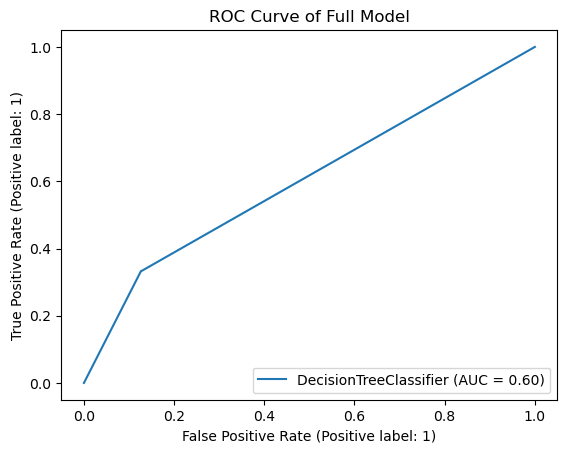

In [243]:
# Single Individual Decision Tree
clf = tree.DecisionTreeClassifier(criterion='gini',random_state = 0)
clf_all = clf.fit(X_train, y_train)
pred_all = clf_all.predict(X_val)
acc = np.sum(pred_all == y_val)/len(pred_all)
print('Decision Tree accuracy of full model= {:0.1f}%'.format(100*acc))
metrics.RocCurveDisplay.from_estimator(clf_all, X_val, y_val)
plt.title('ROC Curve of Full Model')

y_prob = clf_all.predict_proba(X_val)[:, 1]  # Get probability of class 1
auc_score = metrics.roc_auc_score(y_val, y_prob)
print(f"AUC of Decision Tree full model = {auc_score:.3f}")

In [246]:
# Find the predictor which drops the model performance most
auc = []
var_label = []
for i in list(X_train.columns):
    clf = tree.DecisionTreeClassifier(criterion='gini',random_state = 0)
    clf_single = clf.fit(X_train.drop(i, axis = 1), y_train)
    pred_single = clf_single.predict(X_val.drop(i, axis = 1))
    
    # accuracy.append(metrics.accuracy_score(y_val, pred_single))
    y_prob = clf_single.predict_proba(X_val.drop(i, axis = 1))[:, 1]  # Get probability of class 1
    auc.append(metrics.roc_auc_score(y_val, y_prob))
    var_label.append(str(i))
    
print(pd.Series(auc,var_label))
performance = pd.Series(auc,var_label)
print(performance.idxmin())

HighBP                   0.591560
HighChol                 0.597587
BMI                      0.584718
Smoker                   0.601384
Stroke                   0.599601
Myocardial               0.596762
PhysActivity             0.603576
Fruit                    0.606928
Vegetables               0.601267
HeavyDrinker             0.602705
HasHealthcare            0.599992
NotAbleToAffordDoctor    0.603144
GeneralHealth            0.590068
MentalHealth             0.601166
PhysicalHealth           0.597071
HardToClimbStairs        0.604640
BiologicalSex            0.604118
AgeBracket               0.590991
EducationBracket         0.599267
IncomeBracket            0.599682
Zodiac_2                 0.601159
Zodiac_3                 0.605352
Zodiac_4                 0.604196
Zodiac_5                 0.604466
Zodiac_6                 0.602862
Zodiac_7                 0.602676
Zodiac_8                 0.602530
Zodiac_9                 0.603106
Zodiac_10                0.602008
Zodiac_11     

Text(0.5, 1.0, 'ROC Curve')

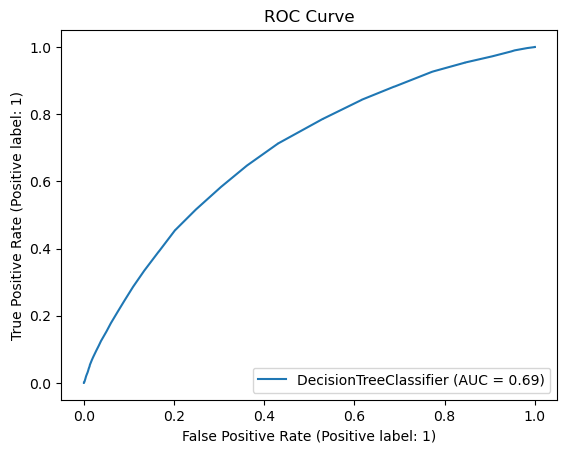

In [214]:
# AUC of the best predictor model
clf = tree.DecisionTreeClassifier(criterion='gini')
clf_best_predictor = clf.fit(X_train['BMI'].to_numpy().reshape(-1,1), y_train)
pred_best_predictor = clf_best_predictor.predict(X_val['BMI'].to_numpy().reshape(-1,1))
metrics.RocCurveDisplay.from_estimator(clf_best_predictor, X_val['BMI'].to_numpy().reshape(-1,1), y_val)
plt.title('ROC Curve')

In [248]:
# Data Cleaning for Random Forest
df = pd.read_csv('diabetes.csv')
df = df.dropna()

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

df['BiologicalSex'] = df['BiologicalSex'].apply(lambda x:x - 1)

df = df.drop(['Zodiac','Zodiac_1'],axis = 1)

train_data, val_data = model_selection.train_test_split(df, test_size = 0.2,random_state = 0)
X_train = train_data.drop('Diabetes', axis = 1) # We drop the target from the features.
X_val  = val_data.drop('Diabetes', axis = 1)  # Note that this does not operate inplace.
y_train = train_data['Diabetes']
y_val  = val_data['Diabetes']

Random Forest accuracy of full model= 86.4%
Random Forest AUC of full model = 0.821


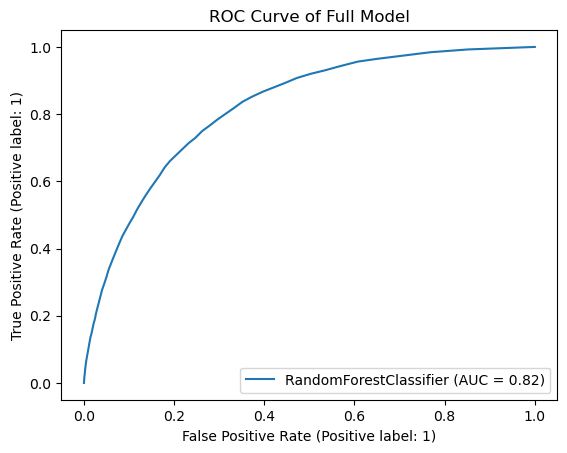

In [250]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini',random_state = 0)
clf_all = clf.fit(X_train, y_train)
pred_all = clf_all.predict(X_val)
acc = np.sum(pred_all == y_val)/len(pred_all)

print('Random Forest accuracy of full model= {:0.1f}%'.format(100*acc))
metrics.RocCurveDisplay.from_estimator(clf_all, X_val, y_val)
plt.title('ROC Curve of Full Model')
y_prob = clf_all.predict_proba(X_val)[:, 1]  # Get probability of class 1
auc_score = metrics.roc_auc_score(y_val, y_prob)
print(f"Random Forest AUC of full model = {auc_score:.3f}")

In [220]:
# Find the predictor which drops the model performance most
auc = []
var_label = []
for i in list(X_train.columns):
    clf = RandomForestClassifier(n_estimators=100, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini',random_state = 0)
    clf_single = clf.fit(X_train.drop(i, axis = 1), y_train)
    pred_single = clf_single.predict(X_val.drop(i, axis = 1))
    
    # accuracy.append(metrics.accuracy_score(y_val, pred_single))
    y_prob = clf_single.predict_proba(X_val.drop(i, axis = 1))[:, 1]  # Get probability of class 1
    auc.append(metrics.roc_auc_score(y_val, y_prob))
    var_label.append(str(i))
    
print(pd.Series(auc,var_label))
performance = pd.Series(auc,var_label)
print(performance.idxmin())

HighBP                   0.812581
HighChol                 0.814602
BMI                      0.802125
Smoker                   0.820023
Stroke                   0.819256
Myocardial               0.818738
PhysActivity             0.820110
Fruit                    0.820448
Vegetables               0.819143
HeavyDrinker             0.819761
HasHealthcare            0.820184
NotAbleToAffordDoctor    0.819503
GeneralHealth            0.802467
MentalHealth             0.821361
PhysicalHealth           0.820603
HardToClimbStairs        0.820566
BiologicalSex            0.817991
AgeBracket               0.808277
EducationBracket         0.818261
IncomeBracket            0.819112
Zodiac_2                 0.819342
Zodiac_3                 0.819876
Zodiac_4                 0.820503
Zodiac_5                 0.818775
Zodiac_6                 0.818772
Zodiac_7                 0.819155
Zodiac_8                 0.818618
Zodiac_9                 0.819373
Zodiac_10                0.820146
Zodiac_11     

Text(0.5, 1.0, 'ROC Curve')

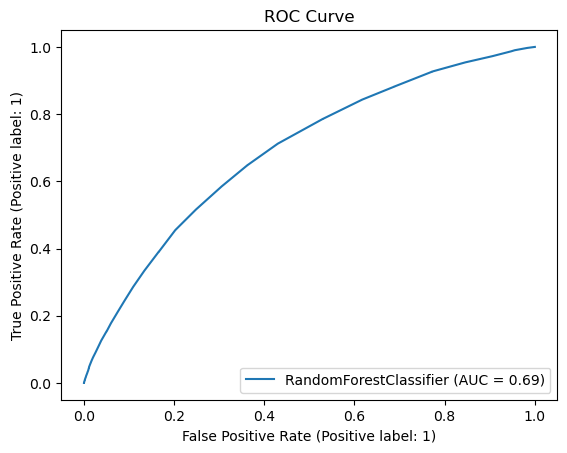

In [222]:
# AUC of the best predictor model
clf = RandomForestClassifier(n_estimators=100, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini')
clf_best_predictor = clf.fit(X_train['BMI'].to_numpy().reshape(-1,1), y_train)
pred_best_predictor = clf_best_predictor.predict(X_val['BMI'].to_numpy().reshape(-1,1))
metrics.RocCurveDisplay.from_estimator(clf_best_predictor, X_val['BMI'].to_numpy().reshape(-1,1), y_val)
plt.title('ROC Curve')

In [224]:
# Data Cleaning for adaBoosting
df = pd.read_csv('diabetes.csv')
df = df.dropna()

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

df['BiologicalSex'] = df['BiologicalSex'].apply(lambda x:x - 1)

df = df.drop(['Zodiac','Zodiac_1'],axis = 1)

train_data, val_data = model_selection.train_test_split(df, test_size = 0.2,random_state = 0)
X_train = train_data.drop('Diabetes', axis = 1) # We drop the target from the features.
X_val  = val_data.drop('Diabetes', axis = 1)  # Note that this does not operate inplace.
y_train = train_data['Diabetes']
y_val  = val_data['Diabetes']

adaBoost accuracy of full model= 86.4%
adaBoost AUC of full model = 0.829


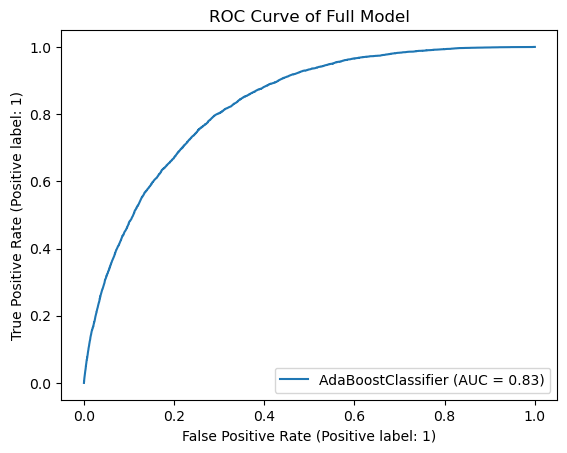

In [226]:
# adaBoosting
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=100, learning_rate=1
)
bdt_all = bdt.fit(X_train, y_train)
pred_all = bdt_all.predict(X_val)
acc = np.sum(pred_all == y_val)/len(pred_all)
print('adaBoost accuracy of full model= {:0.1f}%'.format(100*acc))
metrics.RocCurveDisplay.from_estimator(bdt_all, X_val, y_val)
plt.title('ROC Curve of Full Model')
y_prob = bdt_all.predict_proba(X_val)[:, 1]  # Get probability of class 1
auc_score = metrics.roc_auc_score(y_val, y_prob)
print(f"adaBoost AUC of full model = {auc_score:.3f}")

In [228]:
# Find the predictor which drops the model performance most
auc = []
var_label = []
for i in list(X_train.columns):
    bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=100, learning_rate=1
)
    bdt_single = bdt.fit(X_train.drop(i, axis = 1), y_train)
    pred_single = bdt_single.predict(X_val.drop(i, axis = 1))
    
    # accuracy.append(metrics.accuracy_score(y_val, pred_single))
    y_prob = bdt_single.predict_proba(X_val.drop(i, axis = 1))[:, 1]  # Get probability of class 1
    auc.append(metrics.roc_auc_score(y_val, y_prob))
    var_label.append(str(i))
    
print(pd.Series(auc,var_label))
performance = pd.Series(auc,var_label)
print(performance.idxmin())

HighBP                   0.820217
HighChol                 0.823616
BMI                      0.813400
Smoker                   0.828729
Stroke                   0.828543
Myocardial               0.827694
PhysActivity             0.828729
Fruit                    0.828729
Vegetables               0.828729
HeavyDrinker             0.827503
HasHealthcare            0.828729
NotAbleToAffordDoctor    0.828729
GeneralHealth            0.813972
MentalHealth             0.828490
PhysicalHealth           0.828729
HardToClimbStairs        0.828402
BiologicalSex            0.827787
AgeBracket               0.819367
EducationBracket         0.828556
IncomeBracket            0.827840
Zodiac_2                 0.828729
Zodiac_3                 0.828729
Zodiac_4                 0.828729
Zodiac_5                 0.828729
Zodiac_6                 0.828729
Zodiac_7                 0.828729
Zodiac_8                 0.828729
Zodiac_9                 0.828729
Zodiac_10                0.828729
Zodiac_11     

Text(0.5, 1.0, 'ROC Curve')

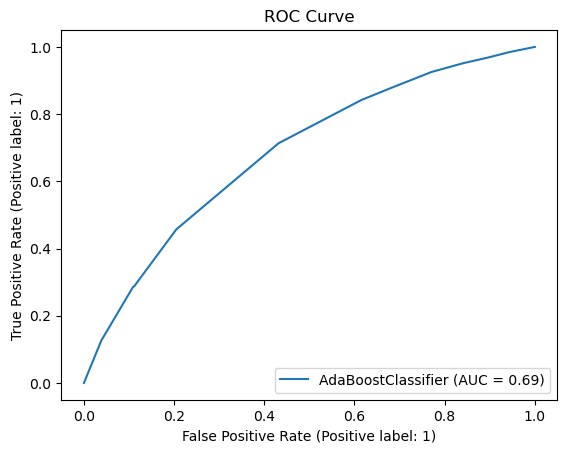

In [7]:
# AUC of the best predictor model
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=100, learning_rate=1
)
bdt_best_predictor = bdt.fit(X_train['BMI'].to_numpy().reshape(-1,1), y_train)
pred_best_predictor = bdt_best_predictor.predict(X_val['BMI'].to_numpy().reshape(-1,1))
metrics.RocCurveDisplay.from_estimator(bdt_best_predictor, X_val['BMI'].to_numpy().reshape(-1,1), y_val)
plt.title('ROC Curve')

In [262]:
# Data Cleaning for Logistic Regression on BiologicalSex only using Zodiac
df = pd.read_csv('diabetes.csv')
df = df.dropna()

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

train_data, val_data = model_selection.train_test_split(df, test_size = 0.2,random_state = 0)
X_train = train_data[['Zodiac_2','Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8','Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']]# We drop the target from the features.
X_val  = val_data[['Zodiac_2','Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8','Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']]  # Note that this does not operate inplace.
y_train = train_data['BiologicalSex']
y_val  = val_data['BiologicalSex']

Accuracy of Logistic Regression only using Zodiac = 55.8%
AUC of Logistic Regression only using Zodiac = 0.503


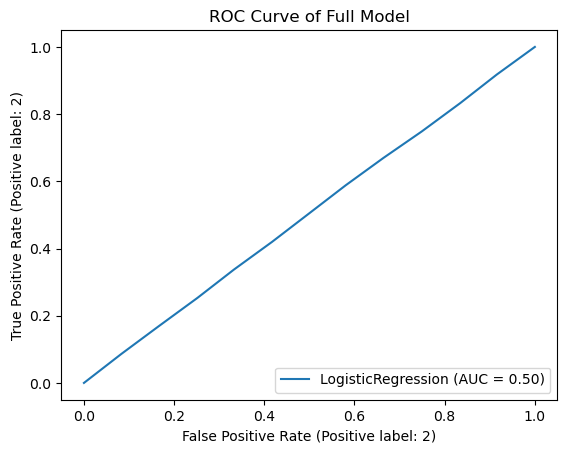

In [264]:
# Logistic Regression on BiologicalSex only using Zodiac
model_all = LogisticRegression(solver = 'liblinear')
model_all.fit(X_train, y_train)
pred_all = model_all.predict(X_val)

accuracy = metrics.accuracy_score(y_val, pred_all)
print(f"Accuracy of Logistic Regression only using Zodiac = {accuracy * 100:.1f}%")
metrics.RocCurveDisplay.from_estimator(model_all, X_val, y_val)
plt.title('ROC Curve of Full Model')
y_prob = model_all.predict_proba(X_val)[:, 1]  # Get probability of class 1
auc = metrics.roc_auc_score(y_val, y_prob)
print(f"AUC of Logistic Regression only using Zodiac = {auc:.3f}")

In [179]:
# Data Cleaning for extra b)
# Standardized
df = pd.read_csv('diabetes.csv')
df = df.dropna()

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
df[continuous_variables] = df[continuous_variables].apply(lambda x:(x - np.mean(x))/np.std(x))

df = df.drop(['Zodiac'],axis = 1)

df['BiologicalSex'] = df['BiologicalSex'] - 1

train_data, val_data = model_selection.train_test_split(df, test_size = 0.2,random_state = 0)
X_train = train_data.drop('BiologicalSex',axis = 1)# We drop the target from the features.
X_val  = val_data.drop('BiologicalSex',axis = 1)# Note that this does not operate inplace.
y_train = train_data['BiologicalSex']
y_val  = val_data['BiologicalSex']

Accuracy of Logistic Regression of Model 1 = 62.1%
AUC of Logistic Regression of Model 1= 0.653
Optimization terminated successfully.
         Current function value: 0.649358
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          BiologicalSex   No. Observations:               202944
Model:                          Logit   Df Residuals:                   202923
Method:                           MLE   Df Model:                           20
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                 0.05330
Time:                        19:55:45   Log-Likelihood:            -1.3178e+05
converged:                       True   LL-Null:                   -1.3920e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

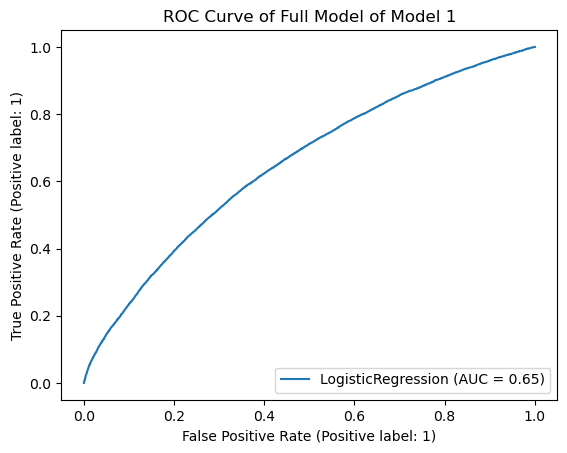

In [183]:
model_all = LogisticRegression(solver = 'liblinear')
model_all.fit(X_train, y_train)
pred_all = model_all.predict(X_val)

accuracy = metrics.accuracy_score(y_val, pred_all)
print(f"Accuracy of Logistic Regression of Model 1 = {accuracy * 100:.1f}%")
metrics.RocCurveDisplay.from_estimator(model_all, X_val, y_val)
plt.title('ROC Curve of Full Model of Model 1')
y_prob = model_all.predict_proba(X_val)[:, 1]  # Get probability of class 1
auc = metrics.roc_auc_score(y_val, y_prob)
print(f"AUC of Logistic Regression of Model 1= {auc:.3f}")

import statsmodels.api as sm

# Assume X_train and y_train are already defined
# Add a constant (intercept) term
X_train_const = sm.add_constant(X_train)

# Fit the logistic regression using statsmodels
model = sm.Logit(y_train, X_train_const)
result = model.fit()

# Print the summary (includes coefficients, standard errors, z-values, p-values)
print(result.summary())

In [256]:
# Data Cleaning for extra b)
# Decoding
df = pd.read_csv('diabetes.csv')
df = df.dropna()

continuous_variables = ['MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
df[continuous_variables] = df[continuous_variables].apply(lambda x:(x - np.mean(x))/np.std(x))

df['underweight'] = (df['BMI'] < 18.5).astype(int)
df['normal'] = ((df['BMI'] > 18.5) & (df['BMI'] < 25)).astype(int)
df['overweight'] = (df['BMI'] > 24.9).astype(int)

df = df.drop(['Zodiac','BMI','underweight'],axis = 1)

df['BiologicalSex'] = df['BiologicalSex'] - 1

train_data, val_data = model_selection.train_test_split(df, test_size = 0.2,random_state = 0)
X_train = train_data.drop('BiologicalSex',axis = 1)# We drop the target from the features.
X_val  = val_data.drop('BiologicalSex',axis = 1)# Note that this does not operate inplace.
y_train = train_data['BiologicalSex']
y_val  = val_data['BiologicalSex']

Accuracy of Logistic Regression of Model 1 = 63.1%
AUC of Logistic Regression of Model 1= 0.665
Optimization terminated successfully.
         Current function value: 0.643558
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          BiologicalSex   No. Observations:               202944
Model:                          Logit   Df Residuals:                   202922
Method:                           MLE   Df Model:                           21
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                 0.06176
Time:                        22:57:49   Log-Likelihood:            -1.3061e+05
converged:                       True   LL-Null:                   -1.3920e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

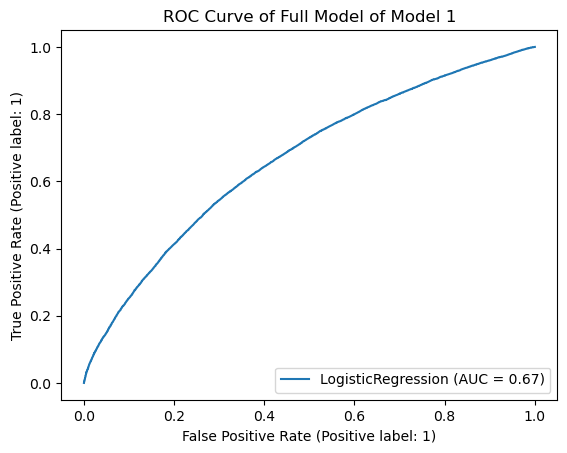

In [257]:
model_all = LogisticRegression(solver = 'liblinear')
model_all.fit(X_train, y_train)
pred_all = model_all.predict(X_val)

accuracy = metrics.accuracy_score(y_val, pred_all)
print(f"Accuracy of Logistic Regression of Model 1 = {accuracy * 100:.1f}%")
metrics.RocCurveDisplay.from_estimator(model_all, X_val, y_val)
plt.title('ROC Curve of Full Model of Model 1')
y_prob = model_all.predict_proba(X_val)[:, 1]  # Get probability of class 1
auc = metrics.roc_auc_score(y_val, y_prob)
print(f"AUC of Logistic Regression of Model 1= {auc:.3f}")

import statsmodels.api as sm

# Assume X_train and y_train are already defined
# Add a constant (intercept) term
X_train_const = sm.add_constant(X_train)

# Fit the logistic regression using statsmodels
model = sm.Logit(y_train, X_train_const)
result = model.fit()

# Print the summary (includes coefficients, standard errors, z-values, p-values)
print(result.summary())